# Objective
Predict the risk of employee departure and identify relevant factors
View predictions of employee departure, forecast churn rates and identify relevant factors contained in employee data

# Outcome
Models with high accuracy of predicting employee departure and identifying reasons for departure

# Business Value
Retain flight-risk talent and thereby improve per employee efficiencies
Minimize cost of employee replacement due to backfills



# To achieve the objective of predicting employee departure
# Here’s the general approach to the problem:

Dataset Structure: We'll need a dataset with the following types of features:

Employee ID: A unique identifier for each employee. 

Demographic Information: e.g., age, gender, education level.

Job Information: e.g., job role, department, years at the company, salary, etc.

Performance Information: e.g., performance score, promotions, awards.

Work-Life Information: e.g., overtime hours, work-life balance.

Target Variable: Whether the employee left the company (Yes/No)

# Load dataset

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset (assuming dataset is named 'employee_data.csv')
data = pd.read_csv('employee_data.csv')
data.head()

,EmployeeID,Age,Gender,JobRole,YearsAtCompany,Salary,JobSatisfaction,PerformanceScore,WorkLifeBalance,Left
0,1,50,Female,Marketing Analyst,12,117833,5,1,4,No
1,2,36,Female,Product Manager,11,98810,2,3,3,No
2,3,29,Male,Business Intelligence Analyst,7,107323,4,5,1,No
3,4,42,Male,Accountant,15,47920,2,1,3,No
4,5,40,Female,HR Specialist,7,55719,4,1,4,No


# Preprocess the data

In [3]:

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['YearsAtCompany'] = label_encoder.fit_transform(data['YearsAtCompany'])
data['Salary'] = label_encoder.fit_transform(data['Salary'])
data['JobSatisfaction'] = label_encoder.fit_transform(data['JobSatisfaction'])
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])
data['WorkLifeBalance'] = label_encoder.fit_transform(data['WorkLifeBalance'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Left'] = label_encoder.fit_transform(data['Left'])  # Convert target column to 0 (No) and 1 (Yes)

# Separate features and target
X = data.drop(['Left', 'EmployeeID'], axis=1)  # Drop EmployeeID and target
y = data['Left']  # Target variable (employee departure)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

data.head()

,EmployeeID,Age,Gender,JobRole,YearsAtCompany,Salary,JobSatisfaction,PerformanceScore,WorkLifeBalance,Left
0,1,28,0,9,11,39236,4,0,3,0
1,2,14,0,12,10,30789,1,2,2,0
2,3,7,1,2,6,34570,3,4,0,0
3,4,20,1,0,14,7909,1,0,2,0
4,5,18,0,8,6,11390,3,0,3,0


# Random Forest model

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop factors contributing to employee departure:")
print(feature_importance_df.head(10))


# Evaluate the model

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Model Accuracy: 0.9150

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14550
           1       0.00      0.00      0.00      1350

    accuracy                           0.92     15900
   macro avg       0.46      0.50      0.48     15900
weighted avg       0.84      0.92      0.87     15900


Confusion Matrix:
[[14549     1]
 [ 1350     0]]


# Save predictions and feature importance

In [16]:
# Save predictions and feature importance
output_file_predictions = 'Downloads/employee_churn_predictions.csv'
output_file_importance = 'Downloads/feature_importance.csv'
data['Predicted_Left'] = model.predict(X_scaled)  # Add predictions to the original data
data.to_csv(output_file_predictions, index=False)
feature_importance_df.to_csv(output_file_importance, index=False)

print(f"\nPredictions saved to '{output_file_predictions}'.")
print(f"Feature importance saved to '{output_file_importance}'.")



Predictions saved to 'Downloads/employee_churn_predictions.csv'.
Feature importance saved to 'Downloads/feature_importance.csv'.


# Visualization 

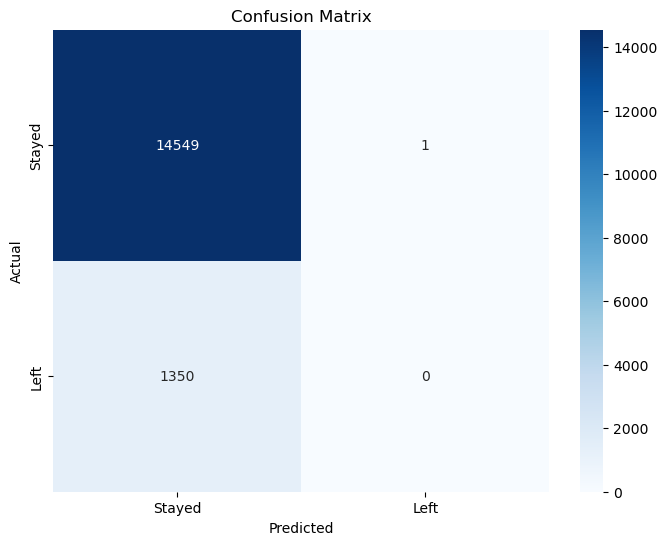

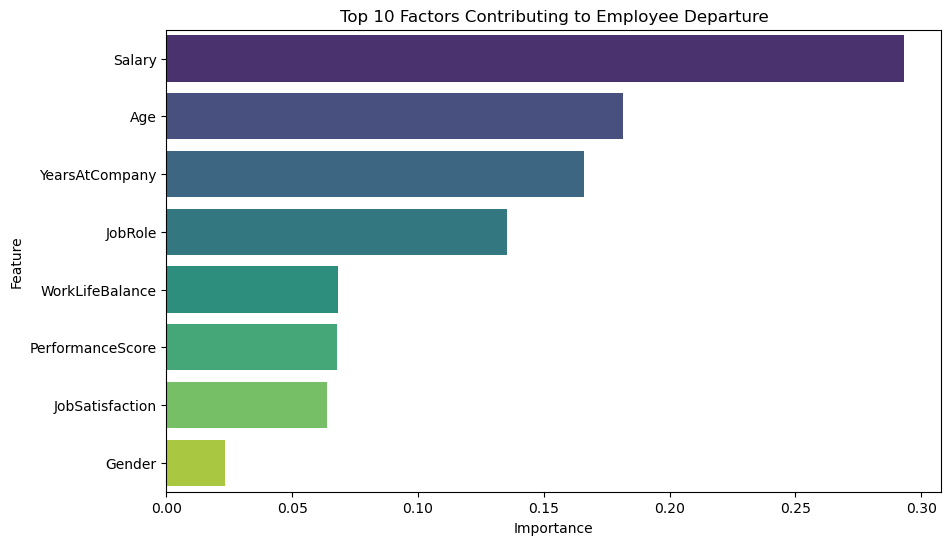

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Stayed', 'Left'])

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Factors Contributing to Employee Departure')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
